In [2]:
import os

In [3]:
data_dir = 'D:\Python\TF_Udemy\DATA\cell_images'

In [4]:
os.listdir(data_dir)

['test', 'train']

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

In [5]:
test_path = data_dir+'\\test\\'
train_path = data_dir+'\\train\\'

In [6]:
test_path

'D:\\Python\\TF_Udemy\\DATA\\cell_images\\test\\'

In [7]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [9]:
os.listdir(test_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144348_cell_144.png'

In [11]:
para_cell = test_path+'parasitized\\'+'C100P61ThinF_IMG_20150918_144348_cell_144.png'

In [13]:
imread(para_cell).shape

(136, 133, 3)

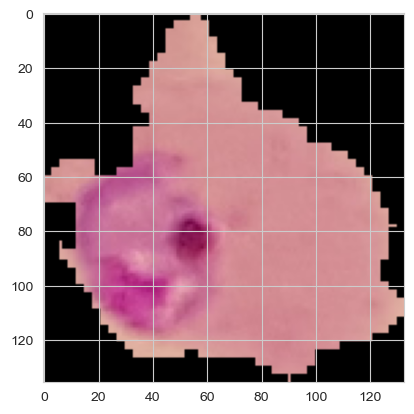

In [15]:
plt.imshow(imread(para_cell))

In [16]:
os.listdir(train_path+'uninfected')[3]

'C100P61ThinF_IMG_20150918_144104_cell_21.png'

In [17]:
uninfected_cell = train_path+'uninfected\\'+'C100P61ThinF_IMG_20150918_144104_cell_21.png'

In [18]:
unifected_cell = imread(uninfected_cell)

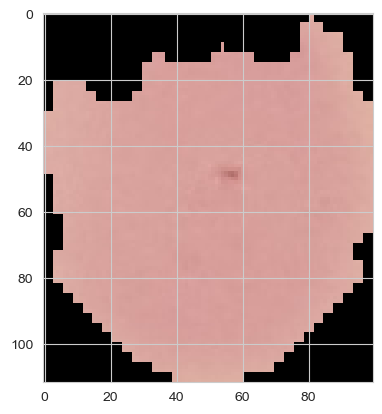

In [19]:
plt.imshow(unifected_cell)

In [20]:
len(os.listdir(train_path+'parasitized'))

12480

In [21]:
len(os.listdir(train_path+'uninfected'))

12480

In [22]:
len(os.listdir(test_path+'parasitized'))

1300

In [23]:
len(os.listdir(test_path+'uninfected'))

1300

# Working with diamentions

In [24]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'uninfected'):
    img = imread(test_path+'uninfected\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [25]:
dim1

[118,
 172,
 130,
 163,
 172,
 139,
 151,
 160,
 145,
 127,
 121,
 154,
 145,
 127,
 154,
 151,
 148,
 130,
 160,
 136,
 139,
 190,
 127,
 133,
 136,
 124,
 151,
 151,
 151,
 160,
 118,
 154,
 154,
 121,
 127,
 118,
 130,
 124,
 163,
 88,
 139,
 127,
 121,
 139,
 166,
 133,
 124,
 154,
 139,
 127,
 124,
 136,
 166,
 133,
 145,
 157,
 181,
 148,
 112,
 124,
 112,
 106,
 121,
 148,
 148,
 112,
 121,
 148,
 97,
 112,
 142,
 118,
 130,
 151,
 133,
 136,
 115,
 145,
 115,
 142,
 136,
 130,
 142,
 124,
 142,
 136,
 166,
 148,
 136,
 142,
 133,
 130,
 139,
 124,
 139,
 121,
 130,
 142,
 133,
 118,
 157,
 127,
 109,
 112,
 139,
 142,
 142,
 112,
 118,
 100,
 127,
 145,
 136,
 160,
 187,
 130,
 130,
 157,
 130,
 130,
 151,
 175,
 145,
 136,
 157,
 133,
 127,
 154,
 133,
 151,
 130,
 136,
 160,
 130,
 139,
 145,
 145,
 145,
 154,
 133,
 160,
 142,
 157,
 145,
 136,
 121,
 115,
 121,
 121,
 127,
 145,
 130,
 133,
 142,
 127,
 121,
 139,
 118,
 118,
 148,
 121,
 145,
 130,
 169,
 142,
 136,
 148,


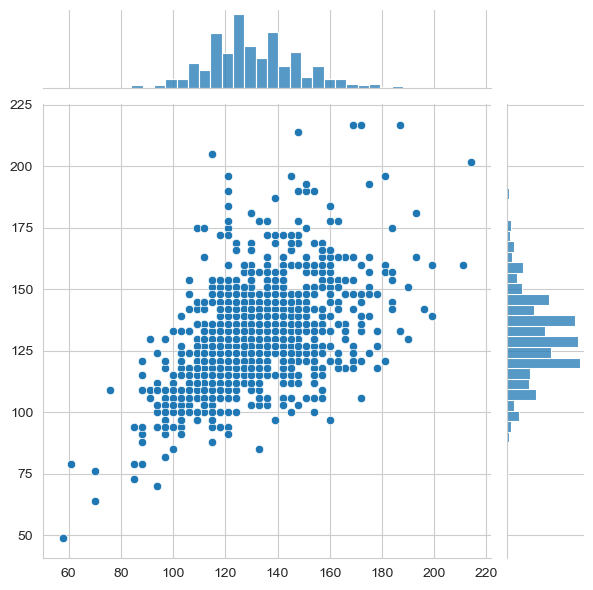

In [28]:
sns.jointplot(x=dim1,y=dim2)

In [29]:
np.mean(dim1)

130.92538461538462

In [30]:
np.mean(dim2)

130.75

In [31]:
image_shape = (130,130,3)

# Preprocessing

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator